**Gabriela Chimali Nava Ramírez | A01710530**

08/11/2025

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import json
import os
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount("/content/drive")

Mounted at /content/drive


## **1. Cargar modelo y datos de clases**

In [ ]:
PROJECT_PATH = "/content/drive/MyDrive/Colab Notebooks/AI/DeepLearning/"
IMG_SIZE = (224, 224)
img_path = (PROJECT_PATH + "")

# Cargar el modelo
model = tf.keras.models.load_model(PROJECT_PATH + "classifier_model_v2.h5")

# Cargar los nombres de las clases
with open(PROJECT_PATH + "class_names.json", "r") as f:
    class_names = json.load(f)

## **2. Función de predicción**

In [7]:
def predecir_imagen_consola(img_path, actual_class=None):
    print(f"--- Prediciendo para: {img_path} ---")

    # Cargar y preprocesar la imagen
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    img_array_normalized = img_array_expanded / 255.0 # Normalizar

    # Realizar predicción
    prediccion = model.predict(img_array_normalized)

    # Interpretar resultados y almacenar en una lista de tuplas (probabilidad, nombre_clase)
    resultados_prediccion = []
    for i, probabilidad in enumerate(prediccion[0]):
        nombre_clase = class_names[i]
        resultados_prediccion.append((probabilidad, nombre_clase))

    # Ordenar los resultados por probabilidad de mayor a menor
    resultados_prediccion.sort(key=lambda x: x[0], reverse=True)

    # Obtener la clase con mayor probabilidad
    clase_indice = np.argmax(prediccion[0])
    nombre_clase_predicha = class_names[clase_indice]
    confianza_predicha = prediccion[0][clase_indice] * 100

    # Mostrar la imagen
    plt.imshow(img)
    plt.title(f"Predicción: {nombre_clase_predicha} ({confianza_predicha:.2f}%)")
    plt.axis('off')
    plt.show()

    # Imprimir los resultados de predicción ordenados (Top 5)
    print("\nTop 5 resultados de predicción:")
    for probabilidad, nombre_clase in resultados_prediccion[:5]:
        confianza = probabilidad * 100
        print(f"  {nombre_clase}: {confianza:.2f}%")

    if actual_class:
        actual_class_prob = 0
        for probabilidad, nombre_clase in resultados_prediccion:
            if nombre_clase == actual_class:
                actual_class_prob = probabilidad * 100
                break
        print(f"\nClase real: {actual_class} ({actual_class_prob:.2f}%)")

## **3. Probar con imagen**

--- Prediciendo para: /content/hq1.jpg ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step


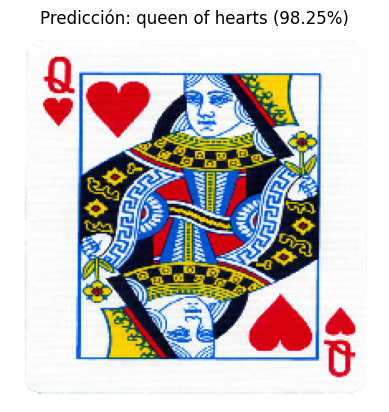


Top 5 resultados de predicción:
  queen of hearts: 98.25%
  queen of diamonds: 1.57%
  jack of hearts: 0.15%
  king of hearts: 0.02%
  queen of clubs: 0.01%

Clase real: queen of hearts (98.25%)


In [9]:
img_path = "/content/hq1.jpg"
CLASS = "queen of hearts"
predecir_imagen_consola(img_path, CLASS)